<a href="https://colab.research.google.com/github/vhpraneeth/VIT_DWDM/blob/main/Lab_8_DWDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18BCE7147

[GitHub Link](https://github.com/vhpraneeth/VIT_DWDM/blob/main/Lab_8_DWDM.ipynb)

# Bagging Machine Learning Algorithm

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.dropna(inplace=True)
df['pclass'].unique()

array([1, 3, 2])

In [ ]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

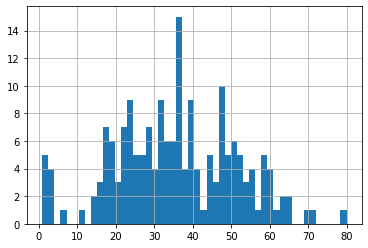

In [ ]:
df['age'].hist(bins=50);

## Data Pre-processing

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [ ]:
X = df[['pclass', 'sex', 'age']]
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [ ]:
X.shape

(182, 3)

In [ ]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [ ]:
y = df['survived']
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

# Fit Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)a

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    'print the accuracy score, classification report and confusion matrix of classifier'
    if train:
        'training performance'
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        'test performance'
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        'training performance'
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        'test performance'
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9528

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.98      0.95      0.97        87

    accuracy                           0.95       127
   macro avg       0.94      0.95      0.95       127
weighted avg       0.95      0.95      0.95       127


Confusion Matrix: 
 [[38  2]
 [ 4 83]]

ROC AUC: 0.9520

Average Accuracy: 	 0.8038
Accuracy SD: 		 0.0771
Test Result:

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.77      0.83      0.80        36

    accuracy                           0.73        55
   macro avg       0.70      0.68      0.69        55
weighted avg       0.72      0.73      0.72        55


Confusion Matrix: 
 [[10  9]
 [ 6 30]]

ROC AUC: 0.6798



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [ ]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
bag_clf.oob_score_

0.7795275590551181

In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9528

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.98      0.95      0.97        87

    accuracy                           0.95       127
   macro avg       0.94      0.95      0.95       127
weighted avg       0.95      0.95      0.95       127


Confusion Matrix: 
 [[38  2]
 [ 4 83]]

ROC AUC: 0.9520

Average Accuracy: 	 0.8038
Accuracy SD: 		 0.0771


In [ ]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.77      0.83      0.80        36

    accuracy                           0.73        55
   macro avg       0.70      0.68      0.69        55
weighted avg       0.72      0.73      0.72        55


Confusion Matrix: 
 [[10  9]
 [ 6 30]]

ROC AUC: 0.6798



***